## Хранение, обработка и визуализация данных

Для хранения данных в программах на Python используются различные структуры данных:
* списки
* словари
* множества
* файлы

### Списки

Позволяют хранить упорядоченные наборы значений и обращаться к ним по номеру:

In [2]:
sites = ["http://yandex.ru", "http://google.com", "http://hse.ru", "http://mai.ru", "http://design.hse.ru"]
sites[1]

'http://google.com'

In [3]:
sites[::-1]

['http://design.hse.ru',
 'http://mai.ru',
 'http://hse.ru',
 'http://google.com',
 'http://yandex.ru']

Напечатам все адреса сайтов с помощью цикла:

In [4]:
for i in range(len(sites)):
  print(f"I want to visit {sites[i]}")

I want to visit http://yandex.ru
I want to visit http://google.com
I want to visit http://hse.ru
I want to visit http://mai.ru
I want to visit http://design.hse.ru


Тоже самое можно сделать более простым способом:

In [5]:
for x in sites:
  print(f"I want to visit {x}")

I want to visit http://yandex.ru
I want to visit http://google.com
I want to visit http://hse.ru
I want to visit http://mai.ru
I want to visit http://design.hse.ru


Но если нам нужны и сами элементы списка, и их номера, то используем специальную конструкцию `enumerate`

In [6]:
for i,x in enumerate(sites):
  print(f"{i+1}. Visit {x}")

1. Visit http://yandex.ru
2. Visit http://google.com
3. Visit http://hse.ru
4. Visit http://mai.ru
5. Visit http://design.hse.ru


Предположим, мы хотим построить рейтинг сайтов по тому, насколько компактны их домашние странички. Для этого нам нужно скачать содержимое всех сайтов. Если мы поищем в интернет, как это сделать, найдём [вот такую страничку](https://stackoverflow.com/questions/47213315/how-to-save-webpage-data-to-a-variable-in-python). Немного адаптируем код из этой странички, и напишем функцию для скачивания:

In [7]:
import requests

def http(url):
  req = requests.get(url)
  if req.status_code in [200]:
      return req.text
  else:
      return None

http(sites[0])

'<body></body><script nonce=\'517ec00676c3dcb1cc92c94d725c91da\'>var it = {"host":"https:\\u002F\\u002Fsso.dzen.ru\\u002Finstall?uuid=36b41bb3-f310-4340-8d15-7b035aecce18","retpath":"https:\\u002F\\u002Fdzen.ru\\u002F?yredirect=true&is_autologin_ya=true"};(function() { var form = document.createElement(\'form\'); var element1 = document.createElement(\'input\'); var element2 = document.createElement(\'input\'); element1.name = \'retpath\'; element1.type = \'hidden\'; element1.value = it.retpath; form.appendChild(element1); element2.name = \'container\'; element2.type = \'hidden\'; element2.value = \'1716314449.10145379.ZozwpeEev7LbASkw.sMbMjZJXTWaNxjJK-hCXEnFrYnXlycIVFarB7cl1pFJSXuXI9iXCrB42FyT89DGfr-hwWAiSvVZxmMEd5gwAH6asZeefCdA0ORYd4OZ1rvoFQiEhvh4DCU0gGB1B6TsQwr-KhVrEOg_oic9IgRNOHSQ1YGyTvSYaWDS3LU7pnho1VJJQ5UL_svLJklp4Mc3qUjh338gr8WbUWSdXXuHE5fY5C_nJ8lqJ1KA8my_hAr1PeE8w1VLlP4pr3Og2gJgUmPwVL1DPC0H_VYfluRoYhRKAOXoYCS63ykG0izwRncVGJbo7Zsm1u6DD4tiDq2Q0lHyO02od3aMcfiQmQrjOo1DFr3KfBIXIb-14

Пройдёмся по списку сайтов, скачаем их содержимое и посчитаем его длину. Получим список длин страничек сайтов:

In [8]:
res = []
for x in sites:
  txt = http(x)
  res.append(len(txt))

res

[16495, 20973, 103525, 958386, 111103]

Тоже самое можно записать более компактно с помощью скобочного синтаксиса **конструктора списков** (*list comprehension*):

In [9]:
res = [ len(http(x)) for x in sites ]
res

[13422, 20651, 103525, 958386, 111103]

Мы можем отсортировать такой список, чтобы найти страничку с наименьшей длиной:

In [10]:
sorted(res)

[13422, 20651, 103525, 111103, 958386]

Но при этом теряется соответствие название сайта - длина, т.е. напечатать список сайтов в порядке возрастания длины мы не можем.

Для того, чтобы это сделать, будет хранить в списке не просто длины, а **пары** название сайте - длина.

In [11]:
pairs = [ (x,len(http(x))) for x in sites ]
pairs

[('http://yandex.ru', 13436),
 ('http://google.com', 20987),
 ('http://hse.ru', 103525),
 ('http://mai.ru', 958386),
 ('http://design.hse.ru', 111103)]

Теперь мы можем отсортировать этот список пар:

In [12]:
sorted(pairs)

[('http://design.hse.ru', 111103),
 ('http://google.com', 20987),
 ('http://hse.ru', 103525),
 ('http://mai.ru', 958386),
 ('http://yandex.ru', 13436)]

Сортировка происходит не по длине, а по первому элементу пары - адресу сайта. Чтобы этого избежать, мы можем поменять порядок элементов в паре - либо в коде выше, либо используя для этого другую переменную:

In [13]:
p = [ (x,y) for y,x in pairs ]
sorted(p)

[(13436, 'http://yandex.ru'),
 (20987, 'http://google.com'),
 (103525, 'http://hse.ru'),
 (111103, 'http://design.hse.ru'),
 (958386, 'http://mai.ru')]

Ура, мы получили список, отсортированный по длине!

На самом деле, мы могли отсортировать исходный список по второму элементу пары, передав в функцию `sorted` параметр `key` - функцию, которая показывает, по какому критерию надо сортировать данные:

In [14]:
def f(x):
  return x[1]

sorted(pairs,key=f)

[('http://yandex.ru', 13436),
 ('http://google.com', 20987),
 ('http://hse.ru', 103525),
 ('http://design.hse.ru', 111103),
 ('http://mai.ru', 958386)]

Для более компактной записи того же выражения, мы могли использовать **лямбда-выражения** - компактный способ записи функции прямо внутри другого выражения.

In [15]:
sorted(pairs,key=lambda x: x[1])

[('http://yandex.ru', 13436),
 ('http://google.com', 20987),
 ('http://hse.ru', 103525),
 ('http://design.hse.ru', 111103),
 ('http://mai.ru', 958386)]

Теперь напечатаем рейтинг сайтов:

In [16]:
for s,l in sorted(pairs,key=lambda x: x[1]):
  print(s)

http://yandex.ru
http://google.com
http://hse.ru
http://design.hse.ru
http://mai.ru


А если нужно напечатать ещё номер в рейтинге - используем конструкцию `enumerate`:

In [17]:
for i,(s,l) in enumerate(sorted(pairs,key=lambda x: x[1])):
  print(f"{i+1}. {s}")

1. http://yandex.ru
2. http://google.com
3. http://hse.ru
4. http://design.hse.ru
5. http://mai.ru


Предположим, нам нужно построить рейтинг только сайтов в домене `.ru`:

In [18]:
pairs = [ (x,len(http(x))) for x in sites if x.endswith('.ru') ]
for i,(s,l) in enumerate(sorted(pairs,key=lambda x: x[1])):
  print(f"{i+1}. {s}")

1. http://yandex.ru
2. http://hse.ru
3. http://design.hse.ru
4. http://mai.ru


## Генераторы

Генераторы позволяют создавать объекты, похожие на списки, но элементы которых вычисляются по мере надобности. Например, мы можем не скачивать все сайты из списка разом в память, а реализовать генератор, который будет скачивать по одному сайту по мере надобности. На самом деле, опишем более общую функцию `map`, которая применяет произвольную функцию `f` к элементам исходного списка по мере надобности:

In [19]:
def mymap(f,l):
  for x in l:
    yield f(x)

mymap(http,sites)

<generator object mymap at 0x78e428211e00>

Мы не получили самих значений, но получили некоторый объект-генератор. По этому генератору можно проходиться циклом `for`:

In [20]:
for x in mymap(http,sites):
  print(len(x))

13435
21108
103525
958385
111103


На самом деле определённая нами функция `mymap` полностью эквивалентна функции `map` в Python:

In [21]:
for x in map(http,sites):
  print(len(x))

13426
21008
103525
958385
111103


Многие другие функции библиотеки Python возвращают генераторы. Вспомним, что у нас был список сайтов и список их длин:

In [22]:
sites, res

(['http://yandex.ru',
  'http://google.com',
  'http://hse.ru',
  'http://mai.ru',
  'http://design.hse.ru'],
 [13422, 20651, 103525, 958386, 111103])

Мы можем легко построить список из пар с помощью функции `zip`:

In [23]:
zip(sites,res)

Чтобы понять, что внутри генератора, мы можем либо пройтись по нему циклом `for`:

In [24]:
for x in zip(sites,res):
  print(x)

('http://yandex.ru', 13422)
('http://google.com', 20651)
('http://hse.ru', 103525)
('http://mai.ru', 958386)
('http://design.hse.ru', 111103)


Либо окружить его конструкцией `list`, чтобы преобразовать в список:

In [25]:
list(zip(sites,res))

[('http://yandex.ru', 13422),
 ('http://google.com', 20651),
 ('http://hse.ru', 103525),
 ('http://mai.ru', 958386),
 ('http://design.hse.ru', 111103)]

## Файлы. Анна Каренина

Будем работать с романом Анна Каренина, для простоты - на английском языке. Для начала загрузим его (и заодно ещё пару файлов) в наше рабочее пространство командой `wget`:

In [26]:
!wget http://www.soshnikov.com/permanent/data/akar_en.txt
!wget http://www.soshnikov.com/permanent/data/positive-words.txt
!wget http://www.soshnikov.com/permanent/data/negative-words.txt

--2024-05-21 18:00:22--  http://www.soshnikov.com/permanent/data/akar_en.txt
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2068089 (2.0M) [text/plain]
Saving to: ‘akar_en.txt’

akar_en.txt         100%[===================>]   1.97M   257KB/s    in 8.2s    

2024-05-21 18:00:31 (246 KB/s) - ‘akar_en.txt’ saved [2068089/2068089]

--2024-05-21 18:00:31--  http://www.soshnikov.com/permanent/data/positive-words.txt
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22408 (22K) [text/plain]
Saving to: ‘positive-words.txt’

positive-words.txt  100%[===================>]  21.88K  58.8KB/s    in 0.4s    

2024-05-21 18:00:32 (58.8 KB/s) - ‘positive-words.txt’ saved [22408/22408]

--202

Прочитаем все строчки романа:

In [27]:
with open('akar_en.txt','r',encoding='utf-8') as f:
  lines = f.readlines()
lines[:30]

['\ufeff\n',
 'The Project Gutenberg EBook of Anna Karenina, by Leo Tolstoy\n',
 '\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n',
 'with this eBook or online at www.gutenberg.org\n',
 '\n',
 '\n',
 'Title: Anna Karenina\n',
 '\n',
 'Author: Leo Tolstoy\n',
 '\n',
 'Release Date: July 01, 1998 [EBook #1399]\n',
 'Last Updated: July 28, 2019\n',
 '\n',
 'Language: English\n',
 '\n',
 'Character set encoding: UTF-8\n',
 '\n',
 '*** START OF THIS PROJECT GUTENBERG EBOOK ANNA KARENINA ***\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Produced by David Brannan, Andrew Sly and David Widger.\n',
 '\n',
 '\n',
 '\n',
 '\n']

Чтобы убрать символы `\n` в конце строки используем функцию `strip()`, которая убирает все пробелы и похожие символы из начала и конца строки. Также сразу избавимся от пустых строк:

In [28]:
lines = [ x.strip() for x in lines[1:] if x.strip()!="" ]
lines[:30]

['The Project Gutenberg EBook of Anna Karenina, by Leo Tolstoy',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 'Title: Anna Karenina',
 'Author: Leo Tolstoy',
 'Release Date: July 01, 1998 [EBook #1399]',
 'Last Updated: July 28, 2019',
 'Language: English',
 'Character set encoding: UTF-8',
 '*** START OF THIS PROJECT GUTENBERG EBOOK ANNA KARENINA ***',
 'Produced by David Brannan, Andrew Sly and David Widger.',
 'ANNA KARENINA',
 'by Leo Tolstoy',
 'Translated by Constance Garnett',
 'Contents',
 'PART ONE',
 'PART TWO',
 'PART THREE',
 'PART FOUR',
 'PART FIVE',
 'PART SIX',
 'PART SEVEN',
 'PART EIGHT',
 'PART ONE',
 'Chapter 1',
 'Happy families are all alike; every unhappy family is unhappy in its',
 'own way.',
 'Everything was in confusion in the Oblonskys’ hous

Теперь надо научиться разбивать строку на слова. Для этого можно использовать функцию `split()`, которая разбивает строку на части по пробелам:

In [29]:
print(lines[101])
print(lines[101].split())

do—his face utterly involuntarily (reflex spinal action, reflected
['do—his', 'face', 'utterly', 'involuntarily', '(reflex', 'spinal', 'action,', 'reflected']


Чтобы разбивать не только по пробелам, но и по всем знакам препинания, используем хитрость: заменим все знаки препинания на пробел с помощью функции `replace`, и потом разобьем строку на части с помощью `split`:

In [30]:
import string

def mysplit(s):
  for x in string.punctuation+"—“’":
    s = s.replace(x,' ')
  return s.split()

mysplit(lines[101])

['do',
 'his',
 'face',
 'utterly',
 'involuntarily',
 'reflex',
 'spinal',
 'action',
 'reflected']

У нас есть список строк романа, и кажую строку мы можем разбить на список слов. Чтобы не получился список списков, сначала объединим все строки романа с помощью полезной функции `join`. Вот как она работает:

In [31]:
", ".join(["One","Two","Three"])

'One, Two, Three'

Объединим все строки, и затем вызовем `mysplit`. Получим список всех слов романа. Также используем `lower` для приведения всего текста к нижнему регистру, чтобы, например, слова `If` и `if` считались одинаковыми:

In [32]:
words = mysplit(" ".join(lines).lower())
words

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'anna',
 'karenina',
 'by',
 'leo',
 'tolstoy',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'title',
 'anna',
 'karenina',
 'author',
 'leo',
 'tolstoy',
 'release',
 'date',
 'july',
 '01',
 '1998',
 'ebook',
 '1399',
 'last',
 'updated',
 'july',
 '28',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'anna',
 'karenina',
 'produced',
 'by',
 'david',
 'brannan',
 'andrew',
 'sly',
 'and',
 'david',
 'widger',
 'anna',
 'karenina',
 'by',
 'leo',
 'tolst

Можем посмотреть, сколько слов в романе:

In [33]:
len(words)

368703

## Словари

Для подсчета частотного словаря нам нужно будет использовать структуру данных - словарь. Вот как он устроен:

In [34]:
d = { "one" : 1 , "two" : 2, "three" : 3 }
print(d["one"])
d["four"] = 4
print(d)

1
{'one': 1, 'two': 2, 'three': 3, 'four': 4}


Заведём пустой словарь `freq`, пройдёмся по всем словам, и добавим их в словарь.

In [35]:
freq = {}
for x in words:
  if x in freq:
    freq[x] += 1
  else:
    freq[x] = 1

freq

{'the': 17738,
 'project': 91,
 'gutenberg': 98,
 'ebook': 11,
 'of': 8739,
 'anna': 825,
 'karenina': 44,
 'by': 1116,
 'leo': 4,
 'tolstoy': 4,
 'this': 1412,
 'is': 1448,
 'for': 2740,
 'use': 75,
 'anyone': 123,
 'anywhere': 19,
 'at': 2933,
 'no': 1151,
 'cost': 19,
 'and': 12976,
 'with': 3799,
 'almost': 124,
 'restrictions': 3,
 'whatsoever': 2,
 'you': 3422,
 'may': 150,
 'copy': 12,
 'it': 4573,
 'give': 197,
 'away': 433,
 'or': 619,
 're': 296,
 'under': 166,
 'terms': 43,
 'license': 16,
 'included': 3,
 'online': 4,
 'www': 10,
 'org': 11,
 'title': 7,
 'author': 9,
 'release': 2,
 'date': 9,
 'july': 6,
 '01': 1,
 '1998': 1,
 '1399': 4,
 'last': 192,
 'updated': 2,
 '28': 8,
 '2019': 1,
 'language': 10,
 'english': 66,
 'character': 35,
 'set': 154,
 'encoding': 1,
 'utf': 1,
 '8': 13,
 'start': 24,
 'produced': 12,
 'david': 4,
 'brannan': 2,
 'andrew': 2,
 'sly': 10,
 'widger': 2,
 'translated': 2,
 'constance': 1,
 'garnett': 1,
 'contents': 5,
 'part': 150,
 'one': 1

Чтобы найти самые частые слова, нужно использовать сортировку. Но сортировку можно применять только к спискам. Поэтому преобразуем словарь в список:

In [36]:
list(freq)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'anna',
 'karenina',
 'by',
 'leo',
 'tolstoy',
 'this',
 'is',
 'for',
 'use',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'away',
 'or',
 're',
 'under',
 'terms',
 'license',
 'included',
 'online',
 'www',
 'org',
 'title',
 'author',
 'release',
 'date',
 'july',
 '01',
 '1998',
 '1399',
 'last',
 'updated',
 '28',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'produced',
 'david',
 'brannan',
 'andrew',
 'sly',
 'widger',
 'translated',
 'constance',
 'garnett',
 'contents',
 'part',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'chapter',
 '1',
 'happy',
 'families',
 'are',
 'all',
 'alike',
 'every',
 'unhappy',
 'family',
 'in',
 'its',
 'own',
 'way',
 'everything',
 'was',
 'confusion',
 'oblonskys',
 'house',
 'wife',
 'had',
 'discovered',
 'th

Мы получили список только ключей. Это не то, что нам нужно. Но заодно можем посмотреть, сколько в романе *уникальных* слов:

In [37]:
len(list(freq))

13123

Чтобы получить список пар, используем `items`:

In [38]:
list(freq.items())

[('the', 17738),
 ('project', 91),
 ('gutenberg', 98),
 ('ebook', 11),
 ('of', 8739),
 ('anna', 825),
 ('karenina', 44),
 ('by', 1116),
 ('leo', 4),
 ('tolstoy', 4),
 ('this', 1412),
 ('is', 1448),
 ('for', 2740),
 ('use', 75),
 ('anyone', 123),
 ('anywhere', 19),
 ('at', 2933),
 ('no', 1151),
 ('cost', 19),
 ('and', 12976),
 ('with', 3799),
 ('almost', 124),
 ('restrictions', 3),
 ('whatsoever', 2),
 ('you', 3422),
 ('may', 150),
 ('copy', 12),
 ('it', 4573),
 ('give', 197),
 ('away', 433),
 ('or', 619),
 ('re', 296),
 ('under', 166),
 ('terms', 43),
 ('license', 16),
 ('included', 3),
 ('online', 4),
 ('www', 10),
 ('org', 11),
 ('title', 7),
 ('author', 9),
 ('release', 2),
 ('date', 9),
 ('july', 6),
 ('01', 1),
 ('1998', 1),
 ('1399', 4),
 ('last', 192),
 ('updated', 2),
 ('28', 8),
 ('2019', 1),
 ('language', 10),
 ('english', 66),
 ('character', 35),
 ('set', 154),
 ('encoding', 1),
 ('utf', 1),
 ('8', 13),
 ('start', 24),
 ('produced', 12),
 ('david', 4),
 ('brannan', 2),
 ('an

Этот список мы можем отсортировать по второму элементу, как мы уже умеем. Чтобы получить сортировку по убыванию, используем знак минус перед частотой:

In [39]:
sorted(list(freq.items()),key = lambda x : -x[1])[:10]

[('the', 17738),
 ('and', 12976),
 ('to', 10233),
 ('of', 8739),
 ('he', 7836),
 ('”', 6884),
 ('a', 6221),
 ('in', 6079),
 ('that', 5560),
 ('was', 5310)]

Не очень интересные слова :( Давайте посмотрим только на слова, длиннее 3 букв:

In [40]:
fw = sorted(list((k,v) for k,v in freq.items() if len(k)>3),key = lambda x : -x[1])[:10]
fw

[('that', 5560),
 ('with', 3799),
 ('said', 2730),
 ('what', 1792),
 ('levin', 1616),
 ('this', 1412),
 ('from', 1322),
 ('have', 1278),
 ('they', 1242),
 ('were', 1235)]

**Задание**: Посчитайте распределение слов по длине, т.е. сколько в тексте присутствует слов длины 3, сколько - длины 4 и т.д.

## Визуализация

Для визуализации используется библиотека `matplotlib`:

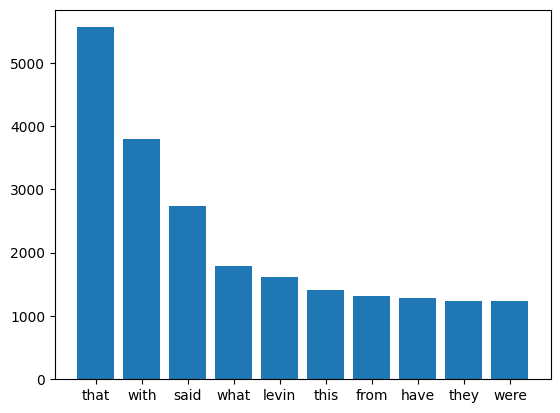

In [41]:
import matplotlib.pyplot as plt

key = [ k for k,v in fw ]
value = [ v for k,v in fw ]

plt.bar(key,value)
plt.show()

**Задание**: Постройте график числа слов в зависимости от их длины.

## Анализируем персонажей

Посмотрим, какие персонажи чаще встречаются вместе. Для этого посчитаем, сколько раз персонажи упоминались вместе в рамках одной главы.

Первое, что нужно сделать - это научиться разбивать роман по главам. Используем для этого генератор:

In [42]:
def bychapter(lines):
  s = []
  for x in lines:
    if x.startswith('Chapter '):
      yield ' '.join(s)
      s = []
    else:
      s.append(x)
  yield ' '.join(s)

list(bychapter(lines))[:3]

['The Project Gutenberg EBook of Anna Karenina, by Leo Tolstoy This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Anna Karenina Author: Leo Tolstoy Release Date: July 01, 1998 [EBook #1399] Last Updated: July 28, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK ANNA KARENINA *** Produced by David Brannan, Andrew Sly and David Widger. ANNA KARENINA by Leo Tolstoy Translated by Constance Garnett Contents PART ONE PART TWO PART THREE PART FOUR PART FIVE PART SIX PART SEVEN PART EIGHT PART ONE',
 'Happy families are all alike; every unhappy family is unhappy in its own way. Everything was in confusion in the Oblonskys’ house. The wife had discovered that the husband was carrying on an intrigue with a French girl, who had been a governess in th

In [43]:
characters = ['Stepan Arkadyevitch','Anna', 'Karenina', 'Karenin', 'Vronsky', 'Levin', 'Kitty']

for i,c in enumerate(bychapter(lines)):
  print(" ".join([f"{x} -> {c.count(x)}" for x in characters]))

Stepan Arkadyevitch -> 0 Anna -> 2 Karenina -> 2 Karenin -> 2 Vronsky -> 0 Levin -> 0 Kitty -> 0
Stepan Arkadyevitch -> 5 Anna -> 0 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 0 Kitty -> 0
Stepan Arkadyevitch -> 14 Anna -> 2 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 0 Kitty -> 0
Stepan Arkadyevitch -> 15 Anna -> 0 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 0 Kitty -> 0
Stepan Arkadyevitch -> 6 Anna -> 2 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 0 Kitty -> 0
Stepan Arkadyevitch -> 30 Anna -> 1 Karenina -> 0 Karenin -> 2 Vronsky -> 0 Levin -> 33 Kitty -> 2
Stepan Arkadyevitch -> 0 Anna -> 0 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 12 Kitty -> 10
Stepan Arkadyevitch -> 0 Anna -> 0 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 6 Kitty -> 0
Stepan Arkadyevitch -> 0 Anna -> 0 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 18 Kitty -> 1
Stepan Arkadyevitch -> 3 Anna -> 0 Karenina -> 0 Karenin -> 0 Vronsky -> 0 Levin -> 26 Kitty -> 9
Stepan Arkadyevitch ->

In [44]:
import numpy as np

A = np.zeros((len(characters),len(characters)))
for c in bychapter(lines):
  for i1,c1 in enumerate(characters):
    for i2,c2 in enumerate(characters):
      if c.count(c1)>0 and c.count(c2)>0:
        A[i1,i2]+=1

A

array([[ 72.,  34.,   3.,  17.,  31.,  44.,  43.],
       [ 34., 115.,  19.,  37.,  91.,  24.,  29.],
       [  3.,  19.,  21.,  21.,  17.,   4.,   5.],
       [ 17.,  37.,  21.,  46.,  30.,   7.,   9.],
       [ 31.,  91.,  17.,  30., 118.,  36.,  36.],
       [ 44.,  24.,   4.,   7.,  36., 125.,  83.],
       [ 43.,  29.,   5.,   9.,  36.,  83., 100.]])

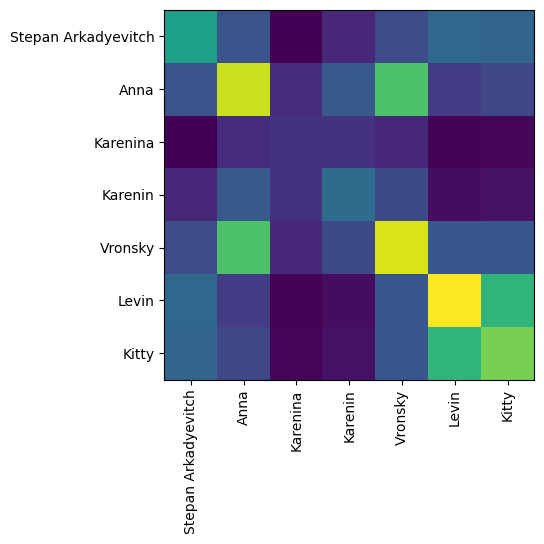

In [45]:
plt.imshow(A)
plt.xticks(range(len(characters)),labels=characters,rotation=90)
plt.yticks(range(len(characters)),labels=characters)
plt.show()

## Позитивность и негативность романа

Попробуем проследить, как меняется позитивность романа от главы к главе. Для этого будем смотреть на частоту вхождения позитивных и негативных слов.

Мы ранее скачали файлы с позитивными и негативными словами. Посмотрим на один из них:

In [46]:
open('positive-words.txt').readlines()[:40]

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
 '; \n',
 '; Opinion Lexicon: Positive\n',
 ';\n',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).\n',
 ';\n',
 '; This file and the papers can all be downloaded from \n',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n',
 ';\n',
 '; If you use this list, please cite the following paper:\n',
 ';\n',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." \n',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge \n',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, \n',
 ';       Washington, USA, \n',
 '; Notes: \n',
 ';    1. The appearance of an opinion word in a sentence does not necessarily  \n',
 ';       mean that the sentence expresses a positive or negative opinion. \n',
 ';       See the paper below:\n',
 ';\n',
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in

Видим, что вначале содержится комментарий, строки которого начинаются с ';'. Все такие строки нам нужно игнорировать. Соберём все оставшиеся строки в список, и преобразуем во множество:

In [47]:
set([ x.strip() for x in open('positive-words.txt').readlines() if not (x.startswith(';')) and x!='\n'][:5])

{'a+', 'abound', 'abounds', 'abundance', 'abundant'}

Сформируем таким образом два множества - позитивных и негативных слов.

In [50]:
pos = set([x.strip() for x in open('positive-words.txt',encoding='latin-1').readlines() if not(x.startswith(';')) and x.strip()!=""])
neg = set([x.strip() for x in open('negative-words.txt',encoding='latin-1').readlines() if not(x.startswith(';')) and x.strip()!=""])


Мы уже научились разбивать текст на главы. Будем проходиться по главам, и для каждой главы - по словам, и смотреть на принадлежность каждого слова множеству `pos` или `neg`:

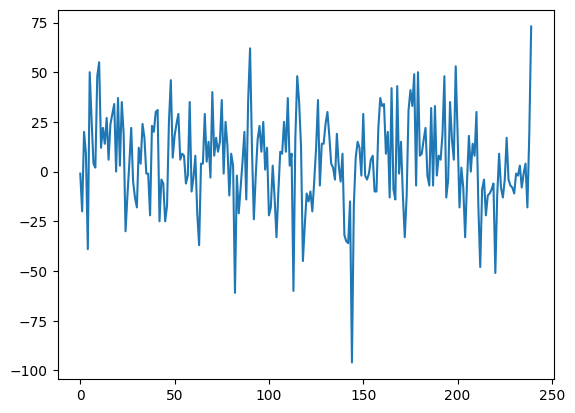

In [51]:
res = []
for c in bychapter(lines):
  x = 0
  for w in mysplit(c.lower()):
    if w in pos:
      x+=1
    if w in neg:
      x-=1
  res.append(x)

plt.plot(res)

Переменная `x` отвечает за общий уровень счастья главы, и, обработав главу, мы записываем его в спискок. В итоге мы видим уровни счастья по главам.

Можем также не сбрасывать `x=0` между главами - это позволит нам посмотреть, как меняется суммарное (кумулятивное) счастье по ходу романа:

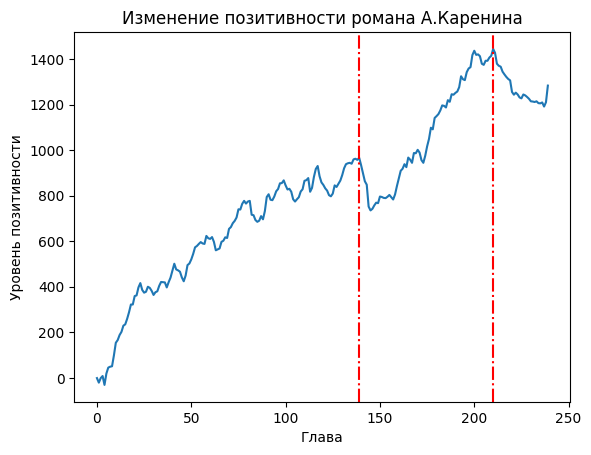

In [63]:
res = []
x = 0
for c in bychapter(lines):
  for w in mysplit(c.lower()):
    if w in pos:
      x+=1
    if w in neg:
      x-=1
  res.append(x)

plt.plot(res)
plt.axvline(139,color='r',linestyle='-.')
plt.axvline(210,color='r',linestyle='-.')
plt.ylabel('Уровень позитивности')
plt.xlabel('Глава')
plt.title('Изменение позитивности романа А.Каренина')
plt.show()

На таком графике особенно хорошо видно падение уровня счастья после 139 главы, и после 210 главы. Чтобы подчеркнуть это на графике, я использую команду `plt.axvline` для проведения вспомогательной вертикальной линии в заданной координате. Обратите внимание, что я могу указать стиль линии и её цвет, чтобы создать более красивый график. Также здесь использованы команды для задания подписей к осям координат, и для общего заголовка ко всему графику.